## Setup Jupyter/IsaacSim workflow

In [1]:
import getpass

user = getpass.getuser()
from omni.isaac.kit import SimulationApp

# Set the path below to your desired nucleus server
# Make sure you installed a local nucleus server before this and that it is running (e.g launch nucleus via the omniverse launcher)
simulation_app = SimulationApp({"livesync_usd": f"omniverse://localhost/Users/{user}/demo_raycast.usd"})

[Warning] [omni.isaac.kit] 
[Warning] [omni.isaac.kit] =========================== DEPRECATION WARNING ===========================
[Warning] [omni.isaac.kit] 
[Warning] [omni.isaac.kit] Traceback (most recent call last):
[Warning] [omni.isaac.kit] File '/home/ljb/.local/share/ov/pkg/isaac-sim-4.1.0/kit/python/lib/python3.10/runpy.py', line 196
[Warning] [omni.isaac.kit]   return _run_code(code, main_globals, None,
[Warning] [omni.isaac.kit] File '/home/ljb/.local/share/ov/pkg/isaac-sim-4.1.0/kit/python/lib/python3.10/runpy.py', line 86
[Warning] [omni.isaac.kit]   exec(code, run_globals)
[Warning] [omni.isaac.kit] File '/home/ljb/.local/share/ov/pkg/isaac-sim-4.1.0/kit/python/lib/python3.10/site-packages/ipykernel_launcher.py', line 18
[Warning] [omni.isaac.kit]   app.launch_new_instance()
[Warning] [omni.isaac.kit] File '/home/ljb/.local/share/ov/pkg/isaac-sim-4.1.0/kit/python/lib/python3.10/site-packages/traitlets/config/application.py', line 1075
[Warning] [omni.isaac.kit]   app.sta

it.widget.filter-1.1.4] startup
[1.282s] [ext: omni.graph.core-2.170.3] startup
[1.285s] [ext: omni.kit.window.extensions-1.4.9] startup
[1.289s] [ext: omni.kit.hotkeys.core-1.3.3] startup
[1.290s] [ext: omni.kit.context_menu-1.8.0] startup
[1.291s] [ext: omni.mdl-52.0.1] startup
[1.304s] [ext: omni.iray.libs-0.0.0] startup
[1.307s] [ext: omni.kit.primitive.mesh-1.0.16] startup
[1.310s] [ext: omni.kit.stage_template.core-1.1.21] startup
[1.310s] [ext: omni.mdl.neuraylib-0.2.5] startup
[1.311s] [ext: omni.ujitso.processor.texture-1.0.0] startup
[1.312s] [ext: omni.kit.window.file_exporter-1.0.29] startup
[1.313s] [ext: omni.kit.stage_templates-1.2.3] startup
[1.314s] [ext: omni.volume-0.5.0] startup
[1.316s] [ext: omni.ujitso.client-0.0.0] startup
[1.316s] [ext: omni.kit.window.file_importer-1.1.11] startup
[1.317s] [ext: omni.kit.window.drop_support-1.0.2] startup
[1.317s] [ext: omni.kit.window.file-1.3.52] startup
[1.319s] [ext: omni.kit.window.content_browser_registry-0.0.6] startup


Warp 1.2.1 initialized:
   CUDA Toolkit 11.8, Driver 12.2
   Devices:
     "cpu"      : "x86_64"
     "cuda:0"   : "NVIDIA GeForce RTX 3060" (12 GiB, sm_86, mempool enabled)
   Kernel cache:
     /home/ljb/.cache/warp/1.2.1
2.087s] [ext: omni.ui_query-1.1.2] startup
[2.088s] [ext: omni.fabric.commands-1.1.4] startup
[2.093s] [ext: omni.physx.vehicle-106.0.20] startup
[2.107s] [ext: omni.kit.manipulator.prim.core-107.0.3] startup
[2.113s] [ext: omni.kit.graph.editor.core-1.5.3] startup
[2.116s] [ext: omni.kit.ui_test-1.2.18] startup
[2.117s] [ext: omni.kit.graph.usd.commands-1.3.1] startup
[2.118s] [ext: omni.physx.camera-106.0.20] startup
[2.126s] [ext: omni.kit.manipulator.prim.fabric-106.0.1] startup
[2.128s] [ext: omni.kit.manipulator.prim.usd-106.0.1] startup
[2.130s] [ext: omni.physx.cct-106.0.20] startup
[2.139s] [ext: omni.physics.tensors-106.0.20] startup
[2.147s] [ext: omni.isaac.version-1.1.0] startup
[2.148s] [ext: omni.kit.manipulator.selection-104.0.9] startup
[2.152s] [ex

In [2]:
import carb
from omni.physx import get_physx_scene_query_interface
from omni.isaac.core import World
from omni.isaac.core.objects import DynamicCuboid, DynamicSphere, DynamicCone
from omni.timeline import get_timeline_interface
import numpy as np

In [3]:
import matplotlib.pyplot as plt

## Setup Test World Programatically

In [4]:
world = World(stage_units_in_meters=1.0)

In [5]:
world.clear()
world.scene.add_default_ground_plane()
# A render/ step or an update call is needed to reflect the changes to the opened USD in Isaac Sim GUI
#  Note: avoid pressing play / pause or stop in the GUI in this workflow.
world.render()

In [6]:
fancy_cube = world.scene.add(
    DynamicCuboid(
        prim_path="/World/random_cube",
        name="fancy_cube",
        position=np.array([0, 0, 1]),
        scale=np.array([1, 1, 1]),
        size=1.0,
        color=np.array([0, 0, 1]),
    )
)
world.render()

In [7]:
fancy_sphere = world.scene.add(
    DynamicSphere(
        prim_path="/World/random_sphere",
        name="fancy_sphere",
        position=np.array([2, -2, 2]),
        radius=1.0,
        color=np.array([0, 1, 0]),
    )
)
world.render()

In [8]:
fancy_cone = world.scene.add(
    DynamicCone(
        prim_path="/World/random_cone",
        name="fancy_cone",
        position=np.array([-2.5, 0, 2]),
        height=2.0,
        radius=1.0,
        color=np.array([1, 0, 0]),
    )
)
world.render()

Step through physics to have objects rest on ground plane

In [9]:
world.reset()
for i in range(100):
    position, orientation = fancy_cube.get_world_pose()
    linear_velocity = fancy_cube.get_linear_velocity()
    print("Cube position is : " + str(position))
    print("Cube's orientation is : " + str(orientation))
    print("Cube's linear velocity is : " + str(linear_velocity))
    # we have control over stepping physics and rendering in this workflow
    # things run in sync
    world.step(render=True)  # execute one physics step and one rendering step

Cube position is : [0.       0.       0.991825]
Cube's orientation is : [1. 0. 0. 0.]
Cube's linear velocity is : [ 0.          0.         -0.32700002]
Cube position is : [0.         0.         0.98364997]
Cube's orientation is : [1. 0. 0. 0.]
Cube's linear velocity is : [ 0.          0.         -0.49050003]
Cube position is : [0.         0.         0.97274995]
Cube's orientation is : [1. 0. 0. 0.]
Cube's linear velocity is : [ 0.          0.         -0.65400004]
Cube position is : [0.        0.        0.9591249]
Cube's orientation is : [1. 0. 0. 0.]
Cube's linear velocity is : [ 0.          0.         -0.81750005]
Cube position is : [0.        0.        0.9427749]
Cube's orientation is : [1. 0. 0. 0.]
Cube's linear velocity is : [ 0.          0.         -0.98100007]
Cube position is : [0.        0.        0.9236999]
Cube's orientation is : [1. 0. 0. 0.]
Cube's linear velocity is : [ 0.      0.     -1.1445]
Cube position is : [0.         0.         0.90189993]
Cube's orientation is : [

## Position of the Sun

In [10]:
from omni.isaac.core.utils.stage import get_current_stage
stage = get_current_stage()

def adjust_light(stage, position):
    lights = []
    for prim in stage.Traverse():
        if prim.GetTypeName() == "SphereLight":
            lights.append(prim)
    if lights:
        light = lights[0]
        light_path = light.GetPath()
        # Adjust position
        translate_attr = stage.GetPrimAtPath(light_path).GetAttribute("xformOp:translate")
        translate_attr.Set(position)
        # Adjust intensity
        intensity_attr = stage.GetPrimAtPath(light_path).GetAttribute("intensity")
        intensity_attr.Set(3e6)

In [11]:
# Define Sun position
# sun_position = (5, 5, 5)
# sun_position = (-5, -5, 5)
sun_position = (5, -5, 5)
# sun_position = (-5, 5, 5)

adjust_light(stage, sun_position)
world.render()

## Visualize the world, as per isaacsim rendering

In [12]:
from omni.syntheticdata import visualize
from omni.kit.viewport.utility import get_active_viewport
import omni.replicator.core as rep
from omni.isaac.core.utils.viewports import set_camera_view


set_camera_view(eye=np.array([0, 0, 10]), target=np.array([0, 0, 0]))

viewport_api = get_active_viewport()
active_cam = viewport_api.get_active_camera()

viewport_api.set_texture_resolution([1000, 1000])
resolution = viewport_api.get_texture_resolution()
render_product = rep.create.render_product(active_cam, resolution)

In [13]:
rgb = rep.AnnotatorRegistry.get_annotator("rgb")
rgb.attach([render_product])
depth = rep.AnnotatorRegistry.get_annotator("distance_to_image_plane")
depth.attach([render_product])
semantic_segmentation = rep.AnnotatorRegistry.get_annotator("semantic_segmentation")
semantic_segmentation.attach([render_product])

In [14]:
# Run the application for multiple frames to ensure the synthetic data pipeline is initialized
timeline = get_timeline_interface()
timeline.play()
for _ in range(10):
    simulation_app.update()
timeline.pause()

# Get groundtruth
rgb_data = rgb.get_data()
depth_data = depth.get_data()
semantic_segmentation_data = semantic_segmentation.get_data()

Module omni.replicator.core.ogn.python._impl.nodes.OgnSemanticSegmentation cc3f83a load on device 'cuda:0' took 0.27 ms


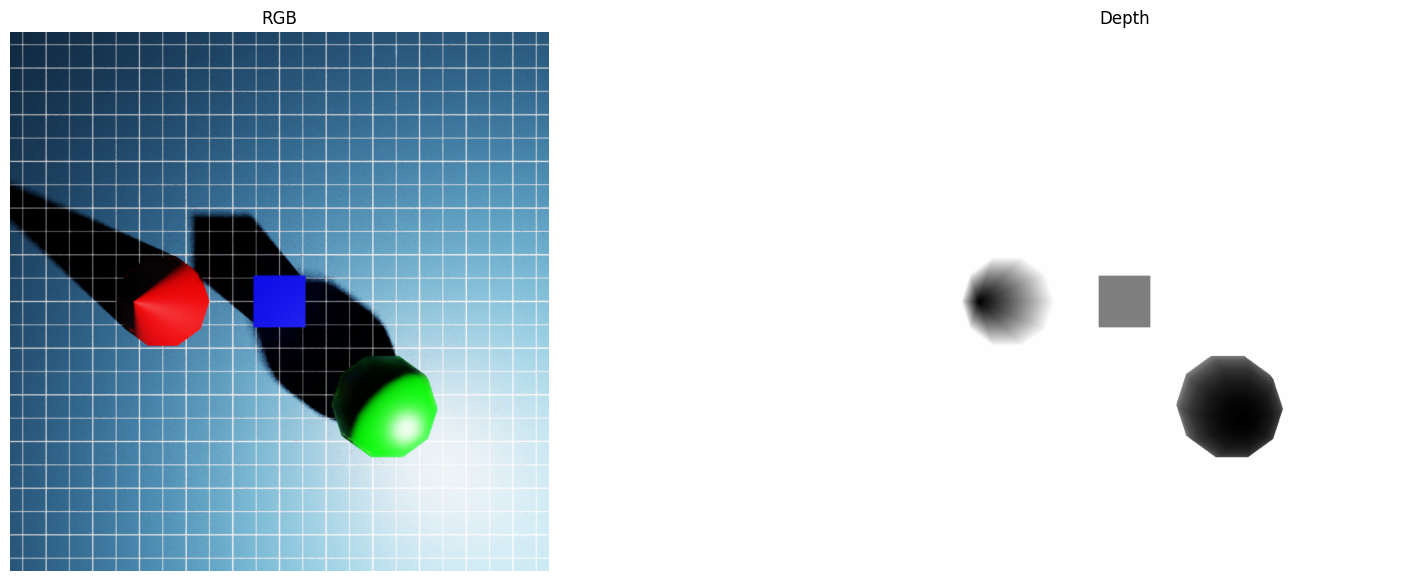

In [15]:
# Setup a figure
_, axes = plt.subplots(1, 2, figsize=(20, 7))
axes = axes.flat
for ax in axes:
    ax.axis("off")

# RGB
axes[0].set_title("RGB")
axes[0].imshow(rgb_data)

# DEPTH
axes[1].set_title("Depth")
depth_data_clipped = np.clip(depth_data, 0, 255)
axes[1].imshow(visualize.colorize_distance(depth_data.squeeze()))

# SEMANTIC SEGMENTATION
#axes[2].set_title("Semantic Segmentation")
# Draw the segmentation mask on top of the color image with a transparency
#axes[2].imshow(rgb_data)
#semantic_segmentation_rgb = visualize.colorize_segmentation(semantic_segmentation_data["data"])
#axes[2].imshow(semantic_segmentation_rgb, alpha=0.7)

## Setup Raycasting parameters

In [16]:
# Initialize grid with proper resolution
cell_size = 0.025  # meters
grid_size = int(10 / cell_size)   # e.g 100x100 grid for 0.1 cell size in a 10x10 area
half_side_size = grid_size/2*cell_size 
grid_size ** 2

160000

## Shadow Map
Use raycasting to check if parts of the ground plane are illuminated by the Sun or not

In [17]:
# Function to determine if a cell is in shadow
def is_in_shadow(cell_center, sun_position):
    # note: vector from the cell to the Sun to avoid max_distance issues
    direction = (sun_position[0] - cell_center[0], 
                 sun_position[1] - cell_center[1], 
                 sun_position[2] - cell_center[2])
    max_distance = np.linalg.norm(direction)
    direction_normalized = tuple(d / max_distance for d in direction)
    # Check if the ray from the surface towards the Sun intersects with any other object    
    hit_info = get_physx_scene_query_interface().raycast_closest(cell_center, direction_normalized, max_distance)
    if hit_info["hit"]:
        return 0  # Shadow
    return 1      # Light

In [18]:
# Calculate shadow map
shadow_map = np.zeros((grid_size, grid_size), dtype=int)
for i in range(grid_size):
    for j in range(grid_size):
        # flip i and j to have origin at bottom left
        cell_center = ((j - grid_size / 2) * cell_size + cell_size / 2, 
                       (i - grid_size / 2) * cell_size + cell_size / 2, 
                       0)  # z = 0 (regardless of objects, this will be improved, see the surface shadow map)
        shadow_map[i, j] = is_in_shadow(cell_center, sun_position)

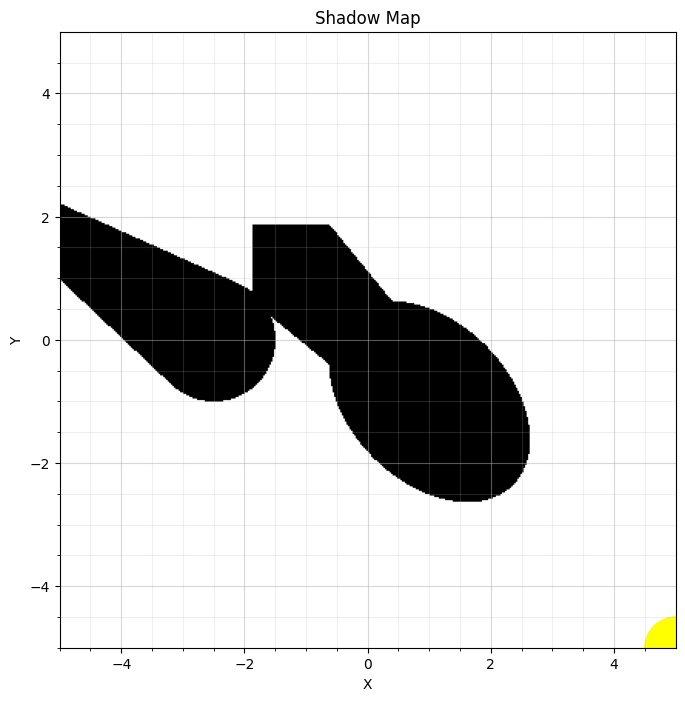

In [19]:
# Plot the shadow map
plt.figure(figsize=(8, 8))
plt.imshow(shadow_map, cmap='gray', origin='lower', extent=[-half_side_size, half_side_size, -half_side_size, half_side_size])

# Add the position of the Sun as a yellow circle
sun_radius = .5
sun_circle = plt.Circle((sun_position[0], sun_position[1]), sun_radius, color='yellow', fill=True)
plt.gca().add_patch(sun_circle)

plt.title('Shadow Map')
plt.xlabel('X')
plt.ylabel('Y')
tick_interval = 0.5
plt.gca().set_xticks(np.arange(-half_side_size, half_side_size, tick_interval), minor=True)
plt.gca().set_yticks(np.arange(-half_side_size, half_side_size, tick_interval), minor=True)
plt.gca().grid(which='minor', alpha=0.2)
plt.gca().grid(which='major', alpha=0.5)

## Height Map
Casts rays downwards from an imaginary ceiling above the scene to compute the height of each asset in the scene

In [20]:
world.render()

In [21]:
ceiling = 30
hit_info = {}
def get_height(cell_center, ceiling):
    global hit_info
    origin = (cell_center[0], cell_center[1], ceiling)
    direction = (0, 0, -1)
    max_distance = ceiling * 2
    
    hit_info = get_physx_scene_query_interface().raycast_closest(origin, direction, max_distance)
    
    if hit_info["hit"]:
        z = hit_info["position"][2]
        if z >= ceiling - 0.1:  # strange bug for some ceiling values the ray cast returns a value close to the ceiling.. TODO keep in mind
            return np.nan
        else:
            return z
    else:
        return 0  # No hit, height is undefined

In [22]:
height_map = np.zeros((grid_size, grid_size))

for i in range(grid_size):
    for j in range(grid_size):
        cell_center = ((j - grid_size / 2) * cell_size + cell_size / 2, 
                       (i - grid_size / 2) * cell_size + cell_size / 2, 
                       0)
        height_map[i, j] = get_height(cell_center, ceiling)


In [23]:
hit_info

{'hit': True,
 'position': carb.Float3(4.9875,4.9875,0),
 'normal': carb.Float3(1.19209e-07,0,1),
 'distance': 30.0,
 'faceIndex': 0,
 'collision': '/World/defaultGroundPlane/GroundPlane/CollisionPlane',
 'rigidBody': '/World/defaultGroundPlane/GroundPlane/CollisionPlane',
 'material': '',
 'protoIndex': 4294967295}

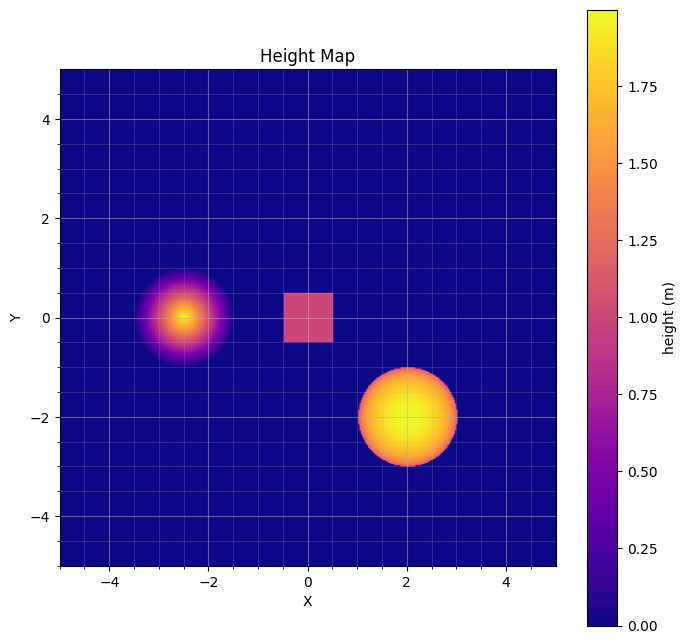

In [24]:
# Plot the height map
plt.figure(figsize=(8, 8))
plt.imshow(height_map, cmap='plasma', origin='lower', extent=[-half_side_size, half_side_size, -half_side_size, half_side_size])
plt.colorbar(label='height (m)')
plt.title('Height Map')
plt.xlabel('X')
plt.ylabel('Y')
tick_interval = 0.5
plt.gca().set_xticks(np.arange(-half_side_size, half_side_size, tick_interval), minor=True)
plt.gca().set_yticks(np.arange(-half_side_size, half_side_size, tick_interval), minor=True)
plt.gca().grid(which='minor', alpha=0.2)
plt.gca().grid(which='major', alpha=0.5)

## Surface Shadow Map

Combines the heightmap and the shadow map: 
Test for shadow at the height given by the heightmap (not z=0 as for the first basic shadow map)

In [25]:
surface_shadow_map = np.zeros((grid_size, grid_size), dtype=int)

for i in range(grid_size):
    for j in range(grid_size):
        cell_center = ((j - grid_size / 2) * cell_size + cell_size / 2, 
                       (i - grid_size / 2) * cell_size + cell_size / 2, 
                       height_map[i, j]+ cell_size/8)  # add a small z offset to avoid casting the ray from within the surface
        
        surface_shadow_map[i, j] = is_in_shadow(cell_center, sun_position)


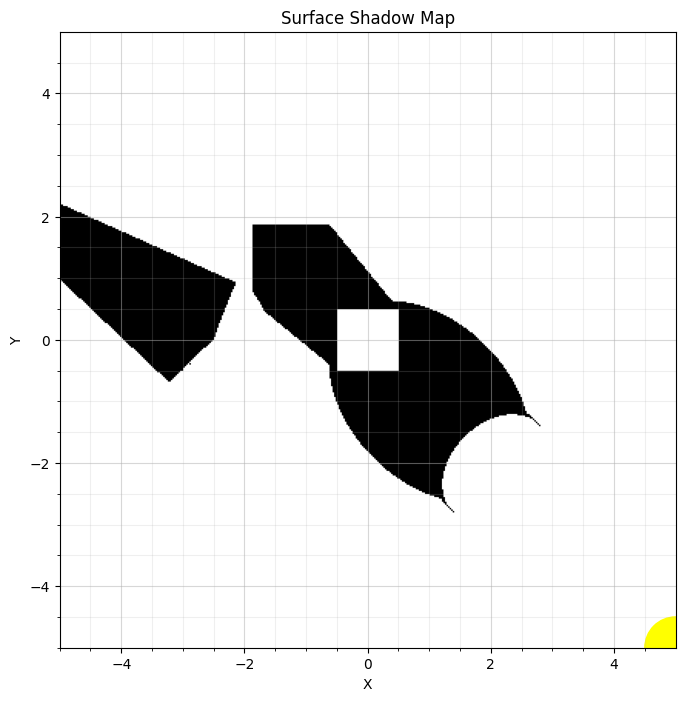

In [26]:
# Plot the shadow map
plt.figure(figsize=(8, 8))
half_side_size = grid_size/2*cell_size 
plt.imshow(surface_shadow_map, cmap='gray', origin='lower', extent=[-half_side_size, half_side_size, -half_side_size, half_side_size])

# Add the position of the Sun as a yellow circle
sun_radius = .5
sun_circle = plt.Circle((sun_position[0], sun_position[1]), sun_radius, color='yellow', fill=True)
plt.gca().add_patch(sun_circle)

plt.title('Surface Shadow Map')
plt.xlabel('X')
plt.ylabel('Y')
tick_interval = 0.5
plt.gca().set_xticks(np.arange(-half_side_size, half_side_size, tick_interval), minor=True)
plt.gca().set_yticks(np.arange(-half_side_size, half_side_size, tick_interval), minor=True)
plt.gca().grid(which='minor', alpha=0.2)
plt.gca().grid(which='major', alpha=0.5)

## Sun Angle Map
Computes the angle between the Sun and the surface normal found at the height given by the heightmap
The Sun angle of cells that are shadowed as per the Surface Shadow map is set to NaN

In [27]:
# Initialize the angle map
sun_angle_map = np.zeros((grid_size, grid_size))

for i in range(grid_size):
    for j in range(grid_size):
        if surface_shadow_map[i, j] == 0:  # In shadow
            sun_angle_map[i, j] = np.nan
        else:
            cell_center = np.array([
                (j - grid_size / 2) * cell_size + cell_size / 2, 
                (i - grid_size / 2) * cell_size + cell_size / 2, 
                height_map[i, j]
            ])
            # Compute the vector from the Sun to the cell center
            vector_to_cell = cell_center - sun_position        
            distance = np.linalg.norm(vector_to_cell)
            direction = vector_to_cell / distance
            
            # Cast a ray from the Sun to the cell center
            hit_info = get_physx_scene_query_interface().raycast_closest(sun_position, direction, distance + 1)  # increase max distance to avoid ray not reaching the surface
            
            if hit_info["hit"]:
                normal = np.array(hit_info["normal"])
                dot_product = np.dot(normal, direction)
                angle = np.arccos(dot_product) * (180 / np.pi)  # Convert to degrees
                sun_angle_map[i, j] = angle
            else:
                sun_angle_map[i, j] = np.nan  # No hit, angle is undefined


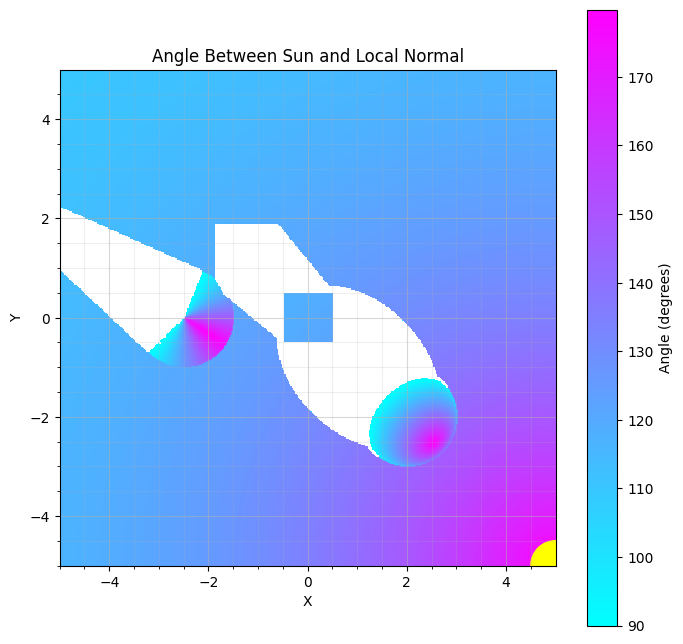

In [28]:
# Plot the angle map using Matplotlib
plt.figure(figsize=(8, 8))
half_side_size = grid_size / 2 * cell_size
plt.imshow(sun_angle_map, cmap='cool', origin='lower', extent=[-half_side_size, half_side_size, -half_side_size, half_side_size])
plt.colorbar(label='Angle (degrees)')
plt.title('Angle Between Sun and Local Normal')
plt.xlabel('X')
plt.ylabel('Y')
tick_interval = 0.5
plt.gca().set_xticks(np.arange(-half_side_size, half_side_size, tick_interval), minor=True)
plt.gca().set_yticks(np.arange(-half_side_size, half_side_size, tick_interval), minor=True)
plt.gca().grid(which='minor', alpha=0.2)
plt.gca().grid(which='major', alpha=0.5)

# Add the position of the Sun as a yellow circle
sun_radius = 0.5
sun_circle = plt.Circle((sun_position[0], sun_position[1]), sun_radius, color='yellow', fill=True)
plt.gca().add_patch(sun_circle)

In [ ]:
# Cleanup application (it will also restart the jupyter kernel)
#simulation_app.close()
